In [ ]:
import time
import matplotlib.pyplot as plt
import random
import sys

# Check for memory_profiler as required by Task 2
try:
    from memory_profiler import memory_usage
    print("memory_profiler is installed.")
except ImportError:
    print("Warning: memory_profiler not found. Please install it using 'pip install memory_profiler'")


In [ ]:
# --- Task 1: Input Setup ---

# Flight Data Format: (Flight ID, Start Time, End Time)
# Times are in 24-hour format (e.g., 9 = 9 AM, 14 = 2 PM)
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13),
    ('F5', 16, 18),
    ('F6', 20, 22)
]

# Crew Data
crew_members = ['C1', 'C2', 'C3']

# Constraints
MIN_REST_TIME = 1  # 1 hour rest required between flights [cite: 30]

In [ ]:
def is_valid(crew_schedule, flight, rest_time):
    """
    Checks if adding 'flight' to 'crew_schedule' violates any constraints.
    Constraints:
    1. No overlapping flights[cite: 28].
    2. Minimum rest time between flights[cite: 30].
    """
    fid, start, end = flight

    for assigned_flight in crew_schedule:
        af_id, af_start, af_end = assigned_flight

        # Check 1: Overlap
        # Overlap occurs if (StartA < EndB) and (StartB < EndA)
        if start < af_end and af_start < end:
            return False

        # Check 2: Rest Time
        # If new flight is after existing: (Start - ExistingEnd) < Rest
        if start >= af_end and (start - af_end) < rest_time:
            return False

        # If new flight is before existing: (ExistingStart - End) < Rest
        if af_start >= end and (af_start - end) < rest_time:
            return False

    return True

In [ ]:
def solve_crew_scheduling(flights, crew_ids):
    # Sort flights by start time to help the logical flow
    sorted_flights = sorted(flights, key=lambda x: x[1])
    n = len(sorted_flights)
    k = len(crew_ids)

    # Dictionary to store the result: { 'C1': [], 'C2': [] ... }
    assignments = {c: [] for c in crew_ids}

    # Recursive Backtracking Function
    def backtrack(index):
        # Base Case: All flights assigned
        if index == n:
            return True

        current_flight = sorted_flights[index]

        # Try assigning this flight to each crew member
        for crew in crew_ids:
            if is_valid(assignments[crew], current_flight, MIN_REST_TIME):
                # Assign (Forward Step)
                assignments[crew].append(current_flight)

                # Recurse
                if backtrack(index + 1):
                    return True

                # Backtrack (Reverse Step)
                assignments[crew].pop()

        return False # Trigger backtracking if no crew can take this flight

    # Start recursion
    if backtrack(0):
        return assignments
    else:
        return None

In [ ]:
print("--- Starting Schedule Assignment ---")
start_time = time.time()

solution = solve_crew_scheduling(flights, crew_members)

end_time = time.time()

if solution:
    print("Solution Found!")
    for crew, assigned in solution.items():
        print(f"{crew}: {assigned}")
else:
    print("No valid schedule found.")

print(f"Execution Time: {end_time - start_time:.6f} seconds")

--- Starting Schedule Assignment ---
Solution Found!
C1: [('F1', 9, 11), ('F3', 13, 15), ('F5', 16, 18), ('F6', 20, 22)]
C2: [('F2', 10, 12)]
C3: [('F4', 11, 13)]
Execution Time: 0.000111 seconds


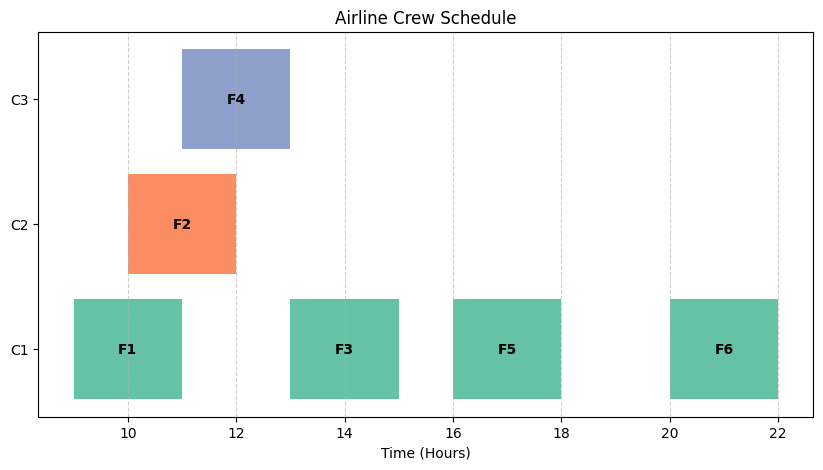

In [ ]:
def plot_gantt(schedule):
    if not schedule:
        return

    fig, ax = plt.subplots(figsize=(10, 5))
    colors = plt.cm.Set2.colors # Use a color map

    y_ticks = []
    y_labels = []

    for idx, (crew, assigned_flights) in enumerate(schedule.items()):
        y_labels.append(crew)
        y_ticks.append(idx)

        for flight in assigned_flights:
            fid, start, end = flight
            duration = end - start
            # Plot bar
            ax.broken_barh([(start, duration)], (idx - 0.4, 0.8), facecolors=colors[idx % len(colors)])
            # Add label
            ax.text(start + duration/2, idx, fid, ha='center', va='center', color='black', fontweight='bold')

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel("Time (Hours)")
    ax.set_title("Airline Crew Schedule")
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Run the plot
if solution:
    plot_gantt(solution)

Running Profiling (this may take a moment)...


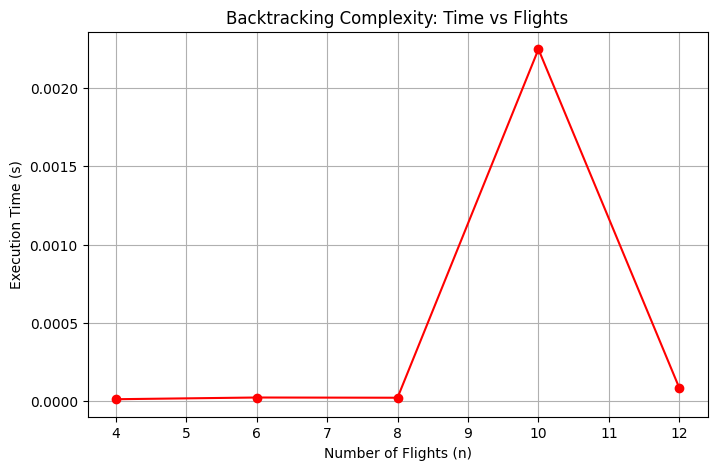

In [ ]:
# --- Task 2: Profiling ---

def generate_flights(n):
    """Generates n random flights for testing complexity"""
    data = []
    for i in range(n):
        start = random.randint(0, 20)
        duration = random.randint(1, 3)
        data.append((f'F{i}', start, start+duration))
    return data

input_sizes = [4, 6, 8, 10, 12] # Increasing number of flights
times = []

print("Running Profiling (this may take a moment)...")
for n in input_sizes:
    test_flights = generate_flights(n)

    # Measure time
    s = time.time()
    solve_crew_scheduling(test_flights, crew_members)
    e = time.time()

    times.append(e - s)

# Plotting the complexity
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, times, marker='o', color='red')
plt.title("Backtracking Complexity: Time vs Flights")
plt.xlabel("Number of Flights (n)")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()